# Online Retail Dataset

### Description
The **Online Retail Dataset** is a collection of transactions from a UK-based online retail store. The store specializes in unique gift items, often for special occasions. This dataset provides detailed information about each transaction made between December 1, 2010, and December 9, 2011.

---

### Dataset Characteristics

- **Number of Instances:** 541,909  
- **Number of Attributes:** 8  
- **Format:** CSV  

---

### Dataset Attributes

1. **InvoiceNo**: Invoice number.  
   - A 6-digit number uniquely identifying each transaction.  
   - Transactions starting with "C" indicate returns.

2. **StockCode**: Product code.  
   - A unique identifier for each item in the inventory.

3. **Description**: Product description.  
   - The name of the item.

4. **Quantity**: Quantity of the product purchased.  
   - Negative values indicate returns.

5. **InvoiceDate**: Date and time of the transaction.

6. **UnitPrice**: Unit price of the product.  
   - Given in British pounds (£).

7. **CustomerID**: Unique customer identifier.  
   - Some records may have missing values for this field.

8. **Country**: Country of the customer.  
   - Most transactions are from the UK, but there are records from other countries as well.

---

### Potential Applications

This dataset is widely used for studies and projects related to:  
- **Customer Behavior Analysis**: Identifying purchasing patterns, churn analysis, and customer segmentation.  
- **Basket Analysis**: Creating recommendations using association algorithms like Apriori.  
- **Sales Prediction**: Forecasting future revenue based on historical data.  
- **Returns Analysis**: Identifying patterns in returned products.

---

### Source
- **Institution:** UCI Machine Learning Repository  
- **URL:** [Online Retail Dataset - UCI](https://archive.ics.uci.edu/dataset/352/online+retail)

---

### Notes
- This dataset contains missing values in the `CustomerID` field.  
- Data cleaning may be required to handle inconsistencies, such as duplicate entries or return transactions (if not relevant for the study).

# 1. Descriptive Statistics

**Objective:** Introduce measures of central tendency, dispersion, and charts.  
**Business Problem:** Summarize a sales dataset to better understand customer characteristics.  
**Background:**  
Descriptive statistics are essential for understanding the basic characteristics of a dataset before moving on to complex analyses. This step is crucial in any data analysis pipeline. Measures such as mean, median, variance, and standard deviation help to summarize and visualize the data in a comprehensible manner.


**Exercise:** 
- Calculate the mean, median, variance, and standard deviation of sales and visualize the data using histograms.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [19]:
file_path = '../data/Online Retail.xlsx'
df_online_retail_raw = pd.read_excel(file_path)
df_online_retail_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 1.1. Missing Values

In [20]:
# missing values
missing_values = df_online_retail_raw.isnull().sum()
missing_percentage = (missing_values / len(df_online_retail_raw)) * 100
df_missing_values = pd.DataFrame({'missing_values': missing_values, 'missing_values(%)': missing_percentage}).round(2)
df_missing_values

,missing_values,missing_values(%)
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


In [21]:
mask_nan = df_online_retail_raw.CustomerID.isnull()
df_online_retail_processed = df_online_retail_raw.copy()
df_online_retail_processed = df_online_retail_processed[~mask_nan]
# missing values
missing_values = df_online_retail_processed.isnull().sum()
missing_percentage = (missing_values / len(df_online_retail_processed)) * 100
df_missing_values = pd.DataFrame({'missing_values': missing_values, 'missing_values(%)': missing_percentage}).round(2)
df_missing_values

,missing_values,missing_values(%)
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


## 1.2. Cancelled products from invoice

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

In [22]:
df_online_retail_processed.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [23]:
df_online_retail_processed['InvoiceNo'] = df_online_retail_processed['InvoiceNo'].astype(str)
df_online_retail_processed['Description'] = df_online_retail_processed['Description'].astype(str)
df_online_retail_processed['CustomerID'] = df_online_retail_processed['CustomerID'].astype(int)
df_online_retail_processed['InvoiceDate'] = pd.to_datetime(df_online_retail_processed['InvoiceDate'])
df_online_retail_processed['Quantity'] = df_online_retail_processed['Quantity'].astype(int)
df_online_retail_processed['UnitPrice'] = df_online_retail_processed['UnitPrice'].astype(float)
df_online_retail_processed['Country'] = df_online_retail_processed['Country'].astype(str)
df_online_retail_processed['StockCode'] = df_online_retail_processed['StockCode'].astype(str)
df_online_retail_processed.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [24]:
mask_cancelled_products = df_online_retail_processed.InvoiceNo.apply(lambda x: 'C' in x)
print(f'Number of cancelled products: {mask_cancelled_products.sum()} from {len(df_online_retail_processed)}')

Number of cancelled products: 8905 from 406829


In [25]:
df_online_retail_processed = df_online_retail_processed[~mask_cancelled_products]

## 1.3. Outliers from Quantity and UnitPrice

In [26]:
def plot_boxplot(df: pd.DataFrame, x: str, ax: plt.Axes):
    sns.boxplot(x=x, data=df, ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.2)
    ax.xaxis.grid(True, linestyle='-', linewidth=0.2)
    # tuun on minorgrid
    ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.2)
    
    

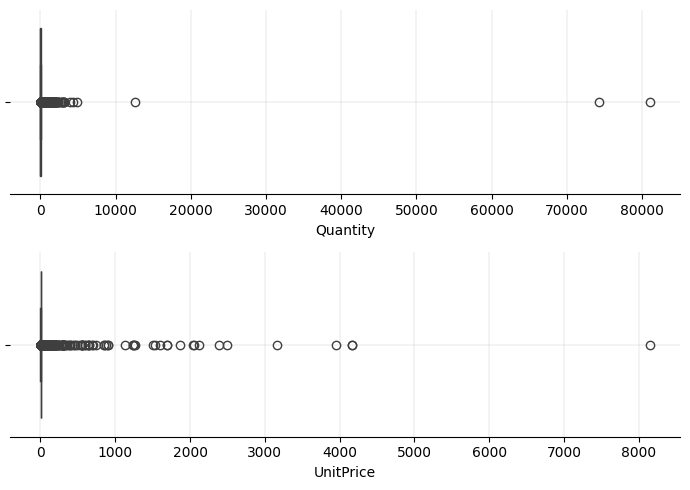

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax1, ax2 = ax.flatten()

axs = [ax1, ax2]

for ax, var in zip(axs, ['Quantity', 'UnitPrice']):
    plot_boxplot(df=df_online_retail_processed, x=var, ax=ax)

plt.tight_layout()
plt.show()

In [29]:
data = df_online_retail_processed['Quantity']
mean_quantity_raw = data.mean()
median_quantity_raw = data.median()
variance_quantity_raw = data.var()
std_dev_quantity_raw = data.std()

print(f"Mean: {mean_quantity_raw}")
print(f"Median: {median_quantity_raw}")
print(f"Variance: {variance_quantity_raw}")
print(f"Standard Deviation: {std_dev_quantity_raw}")

Mean: 13.021823262733587
Median: 6.0
Variance: 32551.45214648759
Standard Deviation: 180.4202099169813


In [30]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(df: pd.DataFrame, variable: str, up: bool = True, low: bool = True):
    df_ = df.copy()
    up_limit, low_limit = outlier_thresholds(df_, variable)
    df_[variable] = df_[variable].astype(float)
    if low:
        df_.loc[(df_[variable] < low_limit), variable] = low_limit
    if up:
        df_.loc[(df_[variable] > up_limit), variable] = up_limit
    return df_[variable]

In [32]:
df_online_retail_processed['Quantity_off_outliers'] =  replace_with_threshold(df=df_online_retail_processed, variable='Quantity', low=False)
df_online_retail_processed['UnitPrice_off_outliers'] =  replace_with_threshold(df=df_online_retail_processed, variable='UnitPrice', low=False)

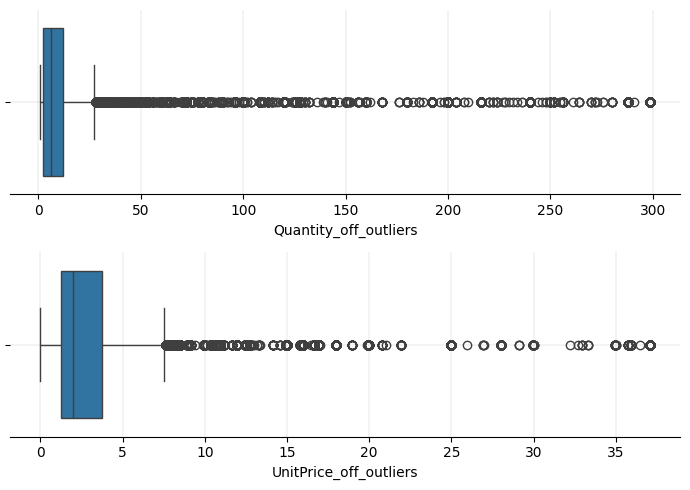

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax1, ax2 = ax.flatten()

axs = [ax1, ax2]

for ax, var in zip(axs, ['Quantity_off_outliers', 'UnitPrice_off_outliers']):
    plot_boxplot(df=df_online_retail_processed, x=var, ax=ax)

plt.tight_layout()
plt.show()

In [34]:
data = df_online_retail_processed['Quantity_off_outliers']
mean_quantity_cleansed = data.mean()
median_quantity_cleansed = data.median()
variance_quantity_cleansed = data.var()
std_dev_quantity_cleansed = data.std()

print(f"Mean row: {mean_quantity_raw} Mean cleansed: {mean_quantity_cleansed}")
print(f"Median row: {median_quantity_raw} Median cleansed: {median_quantity_cleansed}")
print(f"Variance row: {variance_quantity_raw} Variance cleansed: {variance_quantity_cleansed}")
print(f"Standard Deviation row: {std_dev_quantity_raw} Standard Deviation cleansed: {std_dev_quantity_cleansed}")

Mean row: 13.021823262733587 Mean cleansed: 11.833735839004433
Median row: 6.0 Median cleansed: 6.0
Variance row: 32551.45214648759 Variance cleansed: 652.011305277595
Standard Deviation row: 180.4202099169813 Standard Deviation cleansed: 25.5345120430682


In [35]:
def plot_histogram(df: pd.DataFrame, x: str, ax: plt.Axes):
    sns.histplot(data = df, x = x, kde=True, bins=50, ax=ax, common_norm=False, stat="density", color='blue')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.2)
    ax.xaxis.grid(True, linestyle='-', linewidth=0.2)


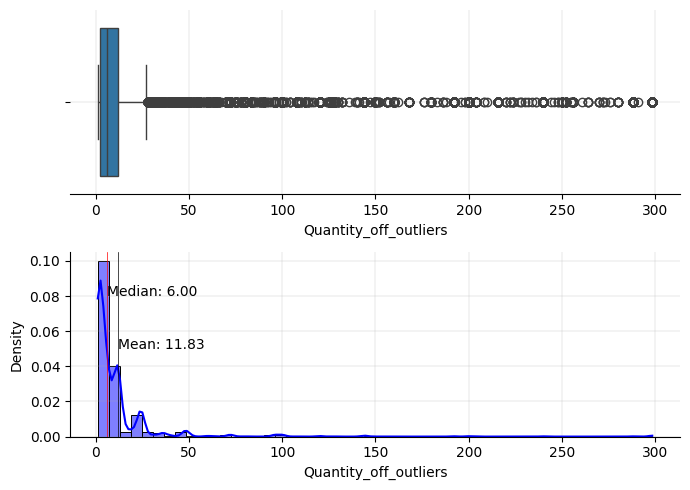

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax1, ax2 = ax.flatten()
axs = [ax1, ax2]
plot_boxplot(df=df_online_retail_processed, x='Quantity_off_outliers', ax=ax1)
plot_histogram(df=df_online_retail_processed, x='Quantity_off_outliers', ax=ax2)

ax2.axvline(mean_quantity_cleansed, color='black', linestyle='solid', linewidth=0.5)
ax2.annotate(f'Mean: {mean_quantity_cleansed:.2f}', xy=(mean_quantity_cleansed, 0.01), xytext=(mean_quantity_cleansed, 0.05))

# add median
ax2.axvline(median_quantity_cleansed, color='red', linestyle='-', linewidth=0.5)
ax2.annotate(f'Median: {median_quantity_cleansed:.2f}', xy=(median_quantity_cleansed, 0.01), xytext=(median_quantity_cleansed, 0.08))

fig.tight_layout()
plt.show()

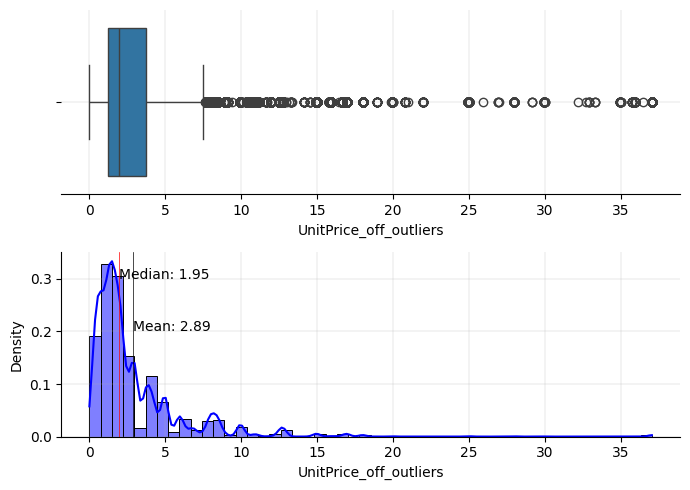

In [38]:
data = df_online_retail_processed['UnitPrice_off_outliers']
mean_unit_price_cleansed = data.mean()
median_unit_price_cleansed = data.median()

fig, ax = plt.subplots(2, 1, figsize=(7, 5))
ax1, ax2 = ax.flatten()
axs = [ax1, ax2]
plot_boxplot(df=df_online_retail_processed, x='UnitPrice_off_outliers', ax=ax1)
plot_histogram(df=df_online_retail_processed, x='UnitPrice_off_outliers', ax=ax2)

ax2.axvline(mean_unit_price_cleansed, color='black', linestyle='solid', linewidth=0.5)
ax2.annotate(f'Mean: {mean_unit_price_cleansed:.2f}', xy=(mean_unit_price_cleansed, 0.01), xytext=(mean_unit_price_cleansed, 0.2))

# add median
ax2.axvline(median_unit_price_cleansed, color='red', linestyle='-', linewidth=0.5)
ax2.annotate(f'Median: {median_unit_price_cleansed:.2f}', xy=(median_unit_price_cleansed, 0.01), xytext=(median_unit_price_cleansed, 0.3))

fig.tight_layout()
plt.show()


---

### 2. Relationship Between Variables

**Objective:** Explore relationships between qualitative and quantitative variables.  
**Business Problem:** Identify relationships between customer characteristics and their purchasing decisions.  
**Background:**  
The relationship between variables helps to identify important associations in data. The correlation coefficient measures the strength and direction of a linear relationship between numerical variables, while the chi-square test evaluates associations between categories.

**Exercise:**
- Use `scipy.stats` to calculate the Pearson correlation coefficient and perform a chi-square test.




In [42]:
# Example data: UnitPrice and Quantity
unit_price = df_online_retail_processed['UnitPrice_off_outliers']
quantity = df_online_retail_processed['Quantity_off_outliers']

corr, _ = pearsonr(unit_price, quantity)
print(f"Pearson Correlation Coefficient: {corr:.2f}")


# Create a contingency table: Country and Quantity
contingency_table = pd.crosstab(df_online_retail_processed['Country'], df_online_retail_processed['Quantity_off_outliers'])

chi2, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square: {chi2:.2f}, p-value: {p_val:.4f}")
#  printar o o que está sendo testado com o chi2 e a conclusão do teste
print(f"H0: There is no association between Country and Quantity")
print(f"H1: There is an association between Country and Quantity")
if p_val < 0.05:
    print(f"Reject H0. There is an association between Country and Quantity")
else:
    print(f"Fail to reject H0. There is no association between Country and Quantity")


Pearson Correlation Coefficient: -0.17
Chi-square: 65947.14, p-value: 0.0000
H0: There is no association between Country and Quantity
H1: There is an association between Country and Quantity
Reject H0. There is an association between Country and Quantity


In [40]:
contingency_table.head()

Quantity,1,2,3,4,5,6,7,8,9,10,...,2880,3000,3114,3186,3906,4300,4800,12540,74215,80995
Country,,,,,,,,,,,,,,,,,,,,,
Australia,52,36,33,51,12,78,0,26,0,54,...,0,0,0,0,0,0,0,0,0,0
Austria,6,27,15,37,0,69,0,42,2,16,...,0,0,0,0,0,0,0,0,0,0
Bahrain,0,3,0,1,0,7,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,56,158,88,230,18,305,4,108,5,197,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,6,4,0,0,4,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


## 1.4. Quantity of products by country

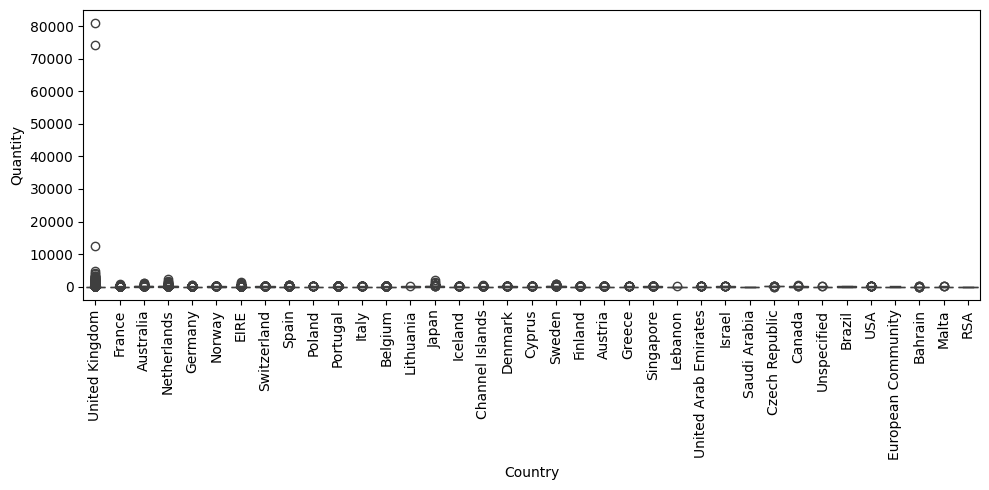

In [44]:
#  plot boxplot de Quantity por Country
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x='Country', y='Quantity', data=df_online_retail_processed, ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

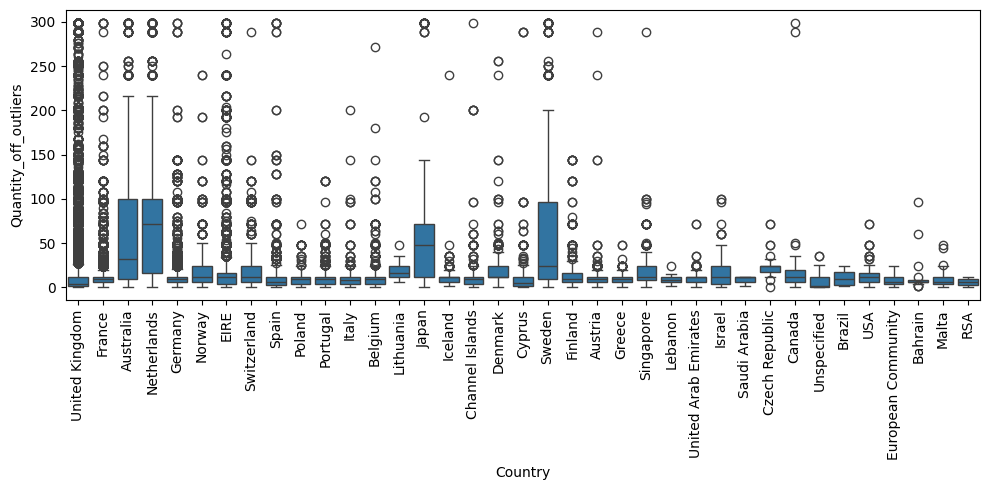

In [46]:
#  plot boxplot de Quantity por Country
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x='Country', y='Quantity_off_outliers', data=df_online_retail_processed, ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()